# Atividade:
- Escolha 2 séries temporais.
- Para cada série faça a previsão utilizando SARIMAX para um conjunto de teste.
- Defina qual o tamanho do conjunto de treinamento e teste.
- Qual métrica de avaliação.
- Explique o motivo de ter selecionados os valores para os parâmetros do modelo.
- Comente sobre sobre os resultados obtidos.

## Importando as bibliotecas nescessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from itertools import product

Configurando o tamanho das imagens

In [ ]:
rcParams['figure.figsize'] = 15, 6

## 1° Data Base → Consumo e produção de eletricidade diaria (série de previsão  de consumo de energia Hidroeletrica)

### Sobre o conjunto de dados
1. Contexto:
  - Consumo e produção de eletricidade diaria por tipo na Romênia durante 5,5 anos
2. Previsão?
  - Prever a produção de enrgia Hydroelectric


In [ ]:
path = '/content/electricity_Consumption_Productioction.csv'
dados = pd.read_csv(path)

In [ ]:
dados

,Date,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01,5957.666667,5924.416667,1391.750000,343.583333,1285.875000,1418.000000,1408.708333,43.291667,32.791667
1,2019-01-02,6322.041667,6795.708333,1390.833333,1106.750000,1252.708333,1615.166667,1340.625000,53.333333,35.750000
2,2019-01-03,7254.083333,7202.250000,1372.041667,989.291667,1477.208333,1822.166667,1467.708333,33.333333,39.833333
3,2019-01-04,7635.083333,7988.500000,1371.416667,1854.583333,1411.833333,1742.000000,1519.541667,45.500000,43.250000
4,2019-01-05,7379.750000,6836.208333,1393.333333,629.500000,1212.041667,1839.916667,1626.291667,92.750000,42.000000
...,...,...,...,...,...,...,...,...,...,...
1912,2024-03-27,6454.625000,7685.625000,1374.750000,1920.208333,1967.916667,1515.250000,612.916667,222.875000,68.083333
1913,2024-03-28,6304.125000,7255.083333,1358.541667,1676.416667,1916.416667,1388.000000,613.291667,232.333333,69.000000
1914,2024-03-29,5898.208333,6162.250000,1374.791667,963.958333,1684.916667,1123.833333,589.000000,358.666667,65.875000
1915,2024-03-30,5383.083333,6125.958333,1393.541667,1023.833333,1737.916667,1079.458333,500.833333,324.250000,65.416667


In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados = dados.set_index('Date')

In [ ]:
dados = pd.DataFrame(index=dados.index, data=dados['Consumption'])

In [ ]:
dados = dados.resample('W').sum()

In [ ]:
dados

,Consumption
Date,
2019-01-06,41554.500000
2019-01-13,56335.000000
2019-01-20,55359.541667
2019-01-27,54995.833333
2019-02-03,53699.333333
...,...
2024-03-03,44197.875000
2024-03-10,44875.125000
2024-03-17,45782.125000


<Axes: xlabel='Date'>

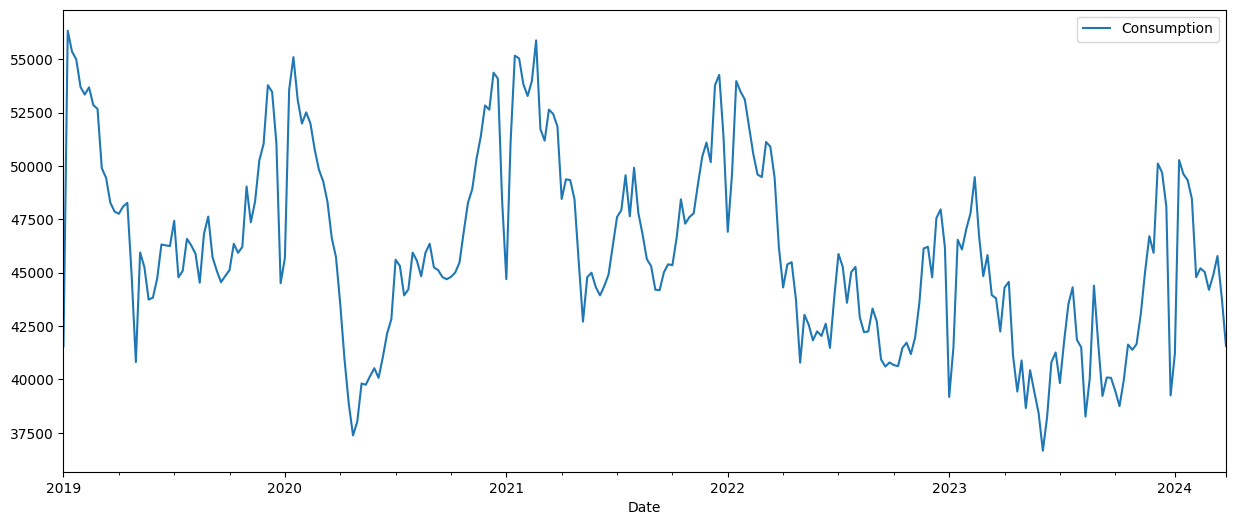

In [ ]:
dados.plot()

Separando base de dados em treino e teste

In [ ]:
train, test = dados.loc['2019':'2022'], dados.loc['2023':]

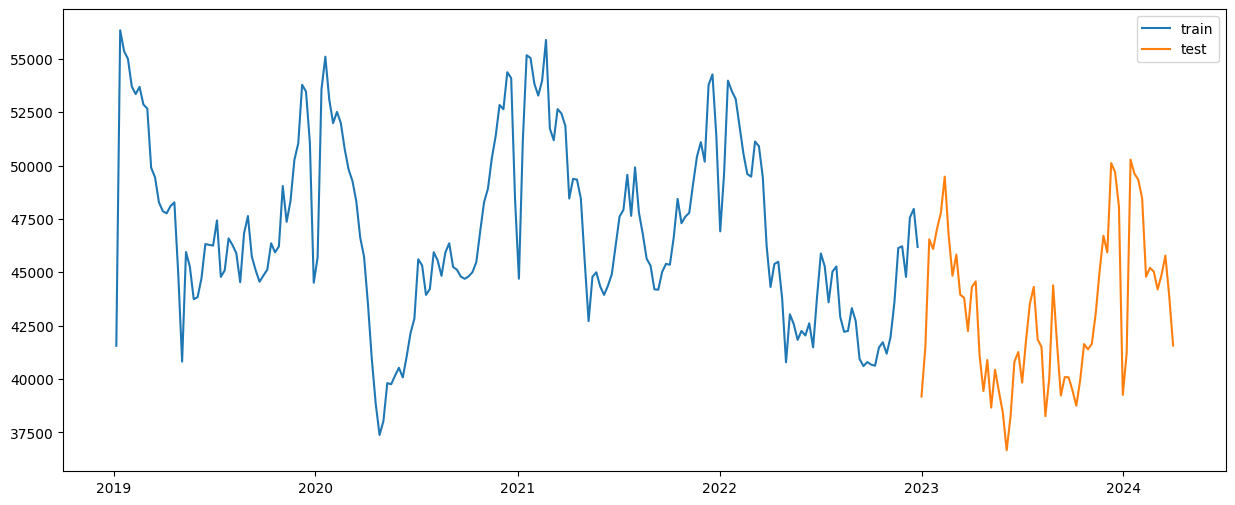

In [ ]:
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.legend(loc = 'best')
plt.show()

Analise da autocorralation e partial autocorrelation

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

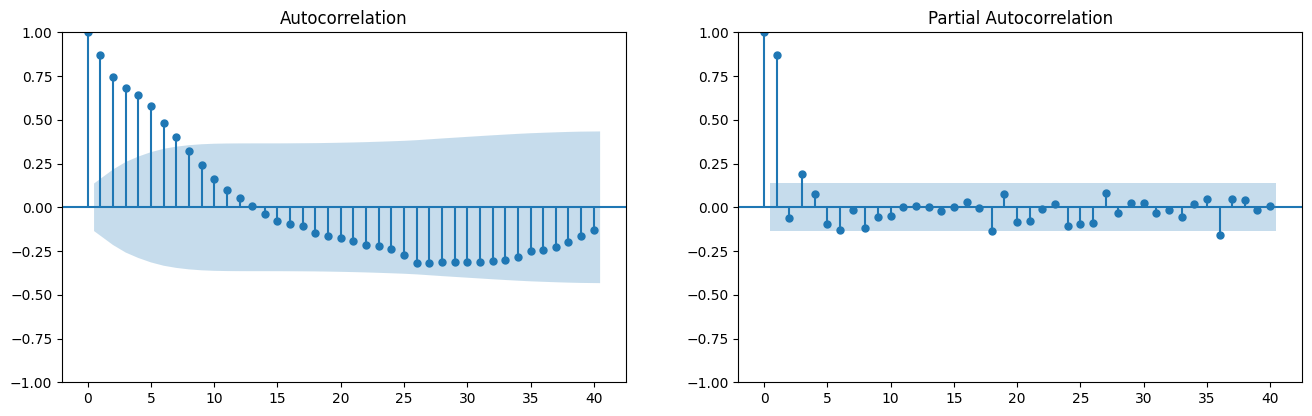

In [ ]:
acf_pacf(train, 40)

Teste de estacionaridade

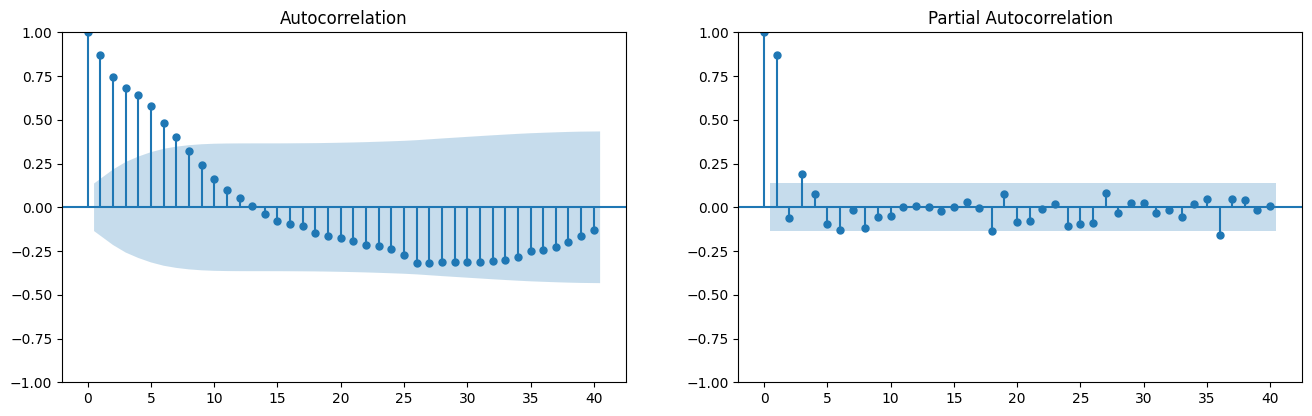

In [ ]:
acf_pacf(train, 40)

In [ ]:
def teste_estacionaria(serie):
  p_value = adfuller(serie)[1]
  print(p_value)
  if p_value < 0.05:
    print("Série estacionaria")
  else:
    print("Série não estacionaria")


In [ ]:
train.head(5)

,Consumption
Date,
2019-01-06,41554.500000
2019-01-13,56335.000000
2019-01-20,55359.541667
2019-01-27,54995.833333
2019-02-03,53699.333333


In [ ]:
teste_estacionaria(train)

0.002700102326668592
Série estacionaria


<Axes: xlabel='Date'>

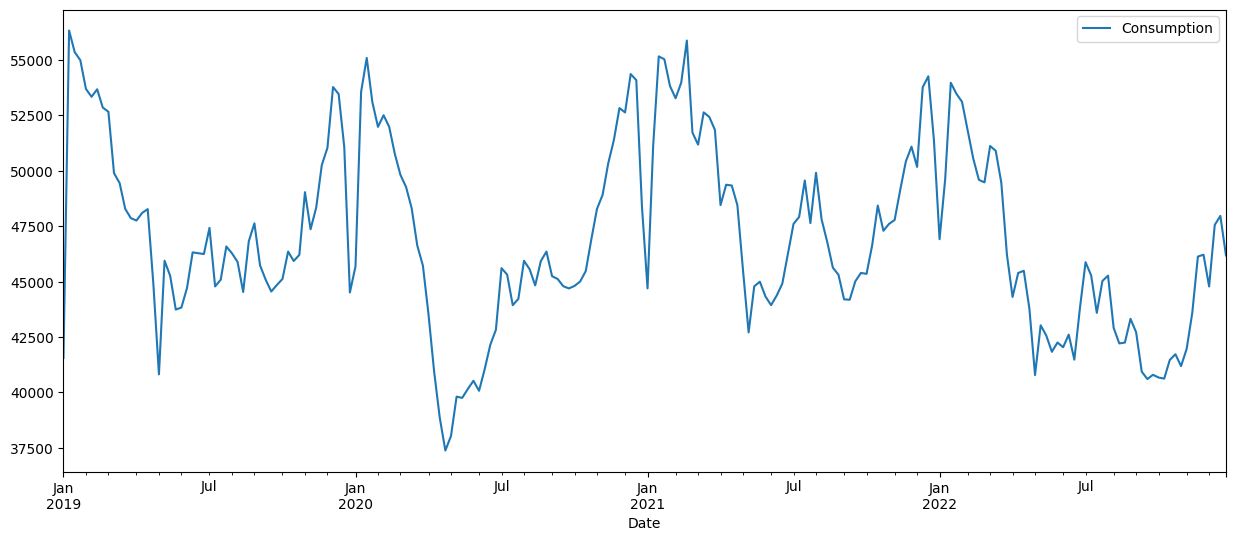

In [ ]:
train.plot()

<Axes: xlabel='Date'>

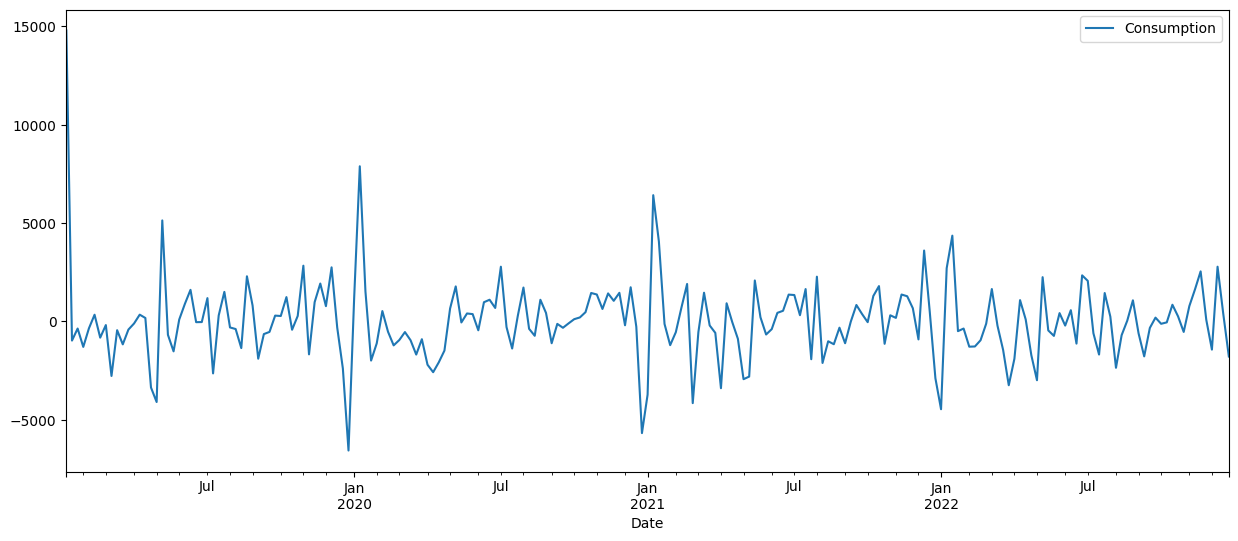

In [ ]:
train.diff(1).dropna().plot()

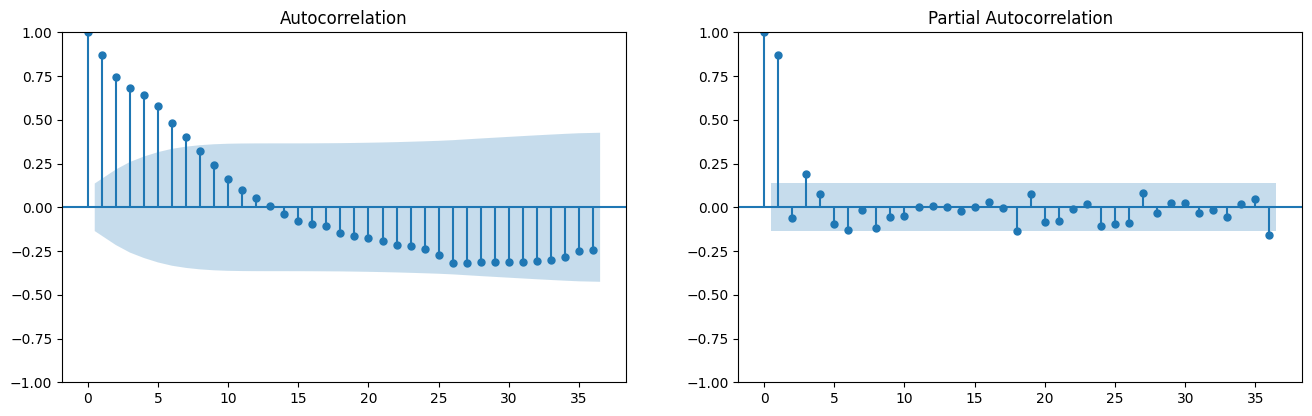

In [ ]:
acf_pacf(train, 36)

Criando o modelo SARIMAX

In [ ]:
model = SARIMAX(train,
                order = (1, 1, 7 )
                ).fit()

In [ ]:
prev_train = model.predict()

In [ ]:
prev_train

Date
2019-01-06        0.000000
2019-01-13    51234.998548
2019-01-20    54274.357440
2019-01-27    52872.833823
2019-02-03    55977.385030
                  ...     
2022-11-27    46798.170170
2022-12-04    45685.447681
2022-12-11    44439.888531
2022-12-18    49030.805324
2022-12-25    47355.877154
Freq: W-SUN, Name: predicted_mean, Length: 208, dtype: float64

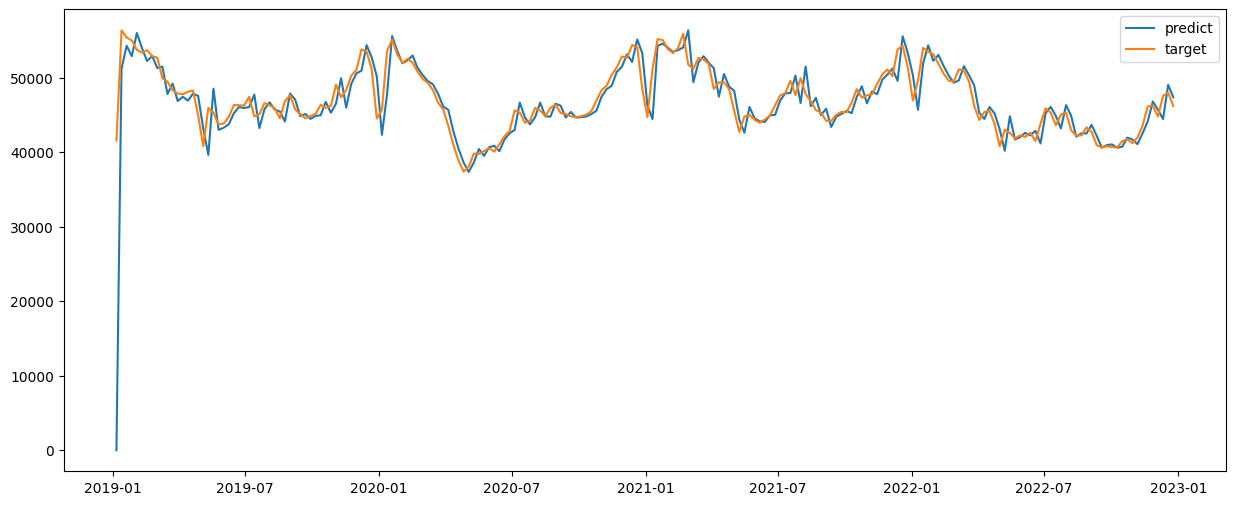

In [ ]:
plt.plot(prev_train, label = 'predict')
plt.plot(train, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
MAPE(train, prev_train)

0.031417353429619085

In [ ]:
prev_test = model.forecast(len(test))

In [ ]:
prev_test

2023-01-01    45434.241637
2023-01-08    45476.614571
2023-01-15    45713.373435
2023-01-22    45510.759095
2023-01-29    45302.921288
                  ...     
2024-03-03    44922.144808
2024-03-10    44922.107304
2024-03-17    44922.074142
2024-03-24    44922.044820
2024-03-31    44922.018893
Freq: W-SUN, Name: predicted_mean, Length: 66, dtype: float64

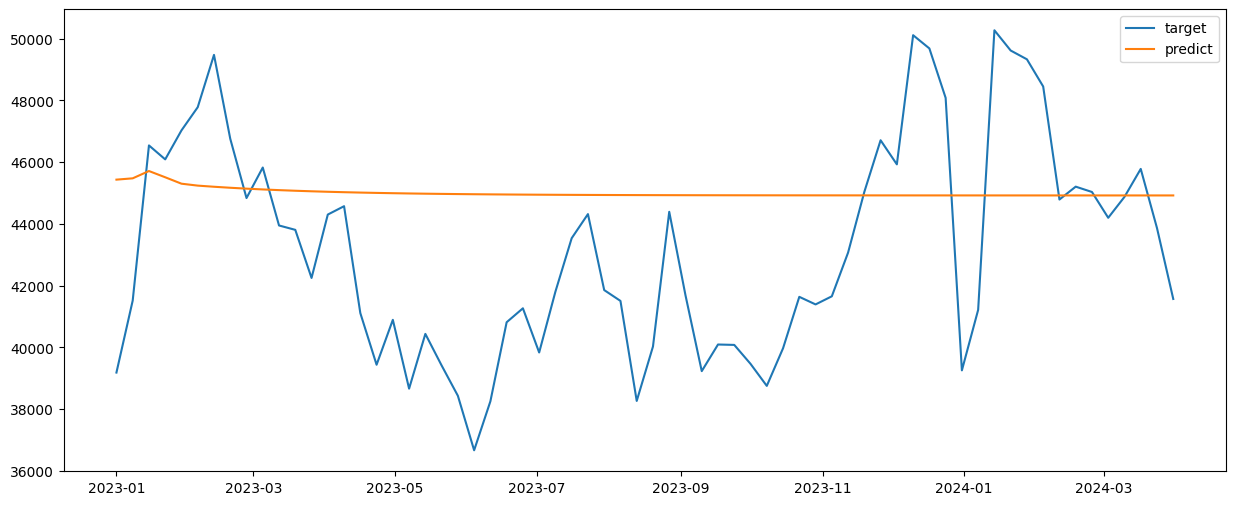

In [ ]:
plt.plot(test, label = 'target')
plt.plot(prev_test, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(test, prev_test)

0.07802932393690934

Melhorando o modelo

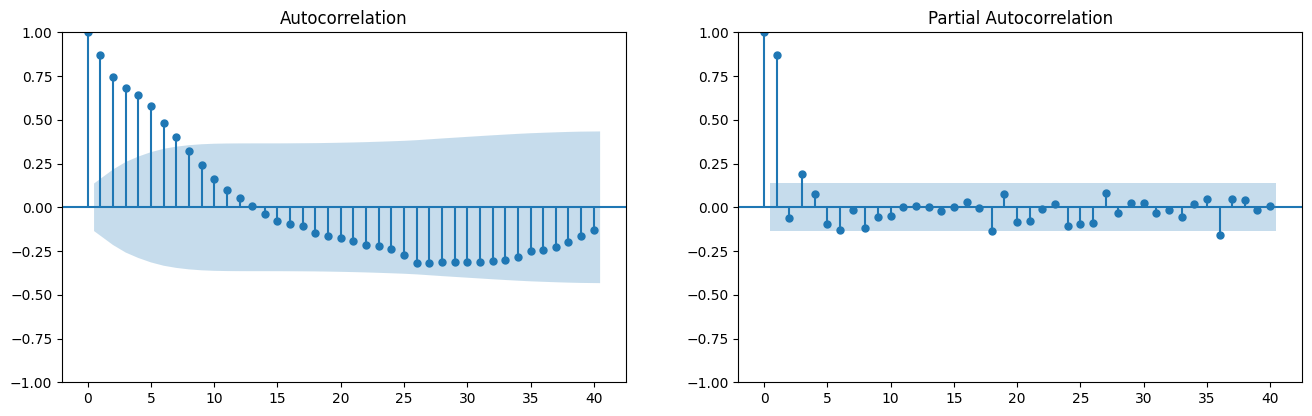

In [ ]:
acf_pacf(train, 40)

<Axes: xlabel='Date'>

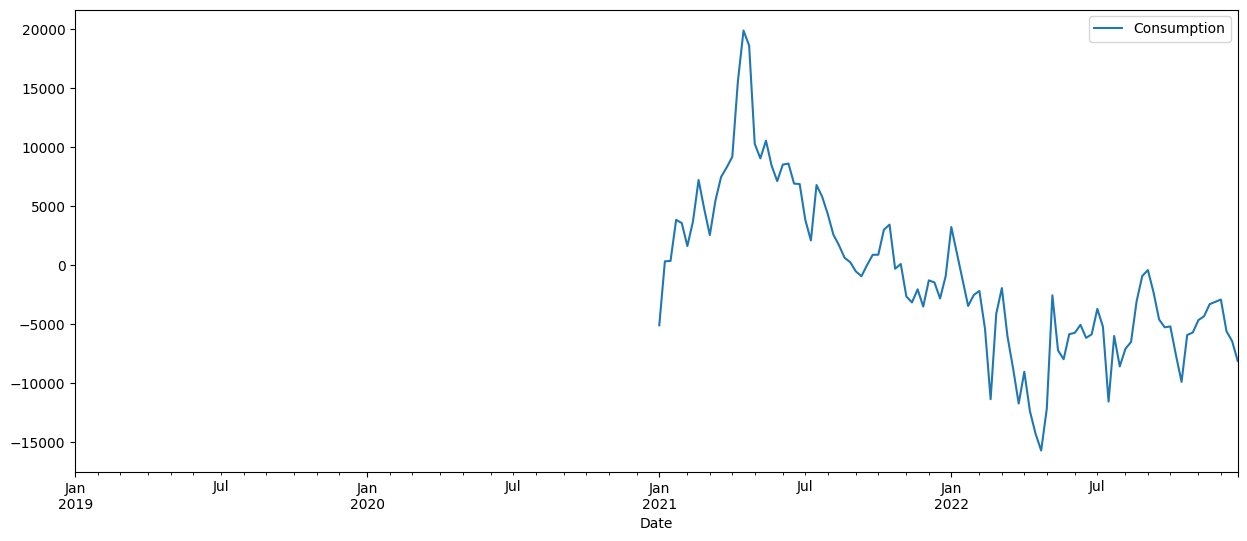

In [ ]:
train.diff(52).diff(52).plot()

In [ ]:
p,d,q = 1, 1, 7
P, D, Q = 1, 1, 1
m = 52


model = SARIMAX(train,
                order = (p, d, q ),
                seasonal_order = (P, D, Q, m)
                ).fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
train_prev = model.predict()
test_prev = model.forecast(len(test))

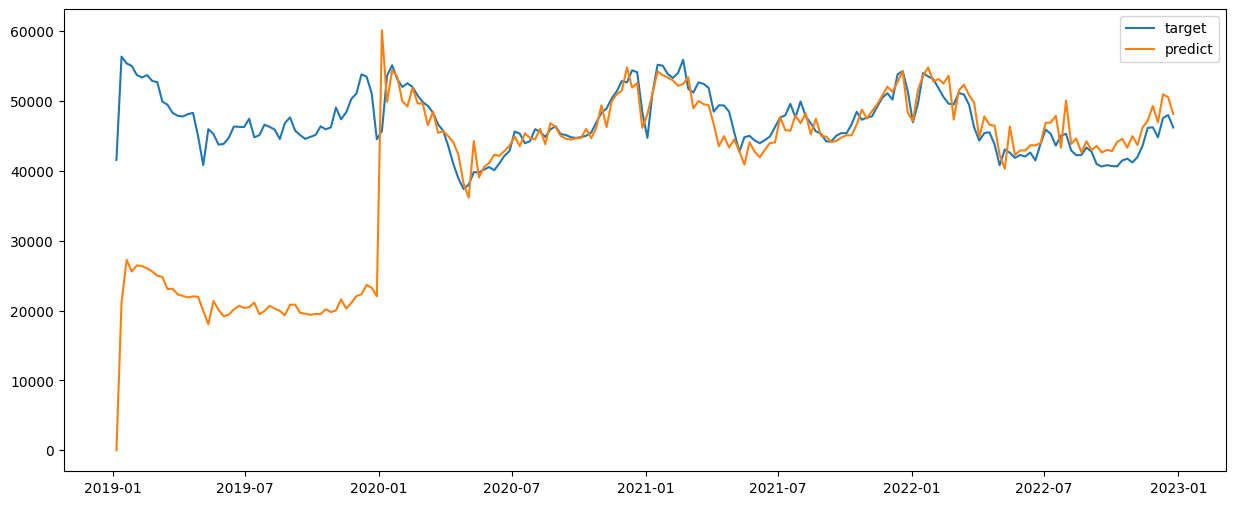

In [ ]:
plt.plot(train, label = 'target')
plt.plot(train_prev, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(train, train_prev)

0.16682856259981252

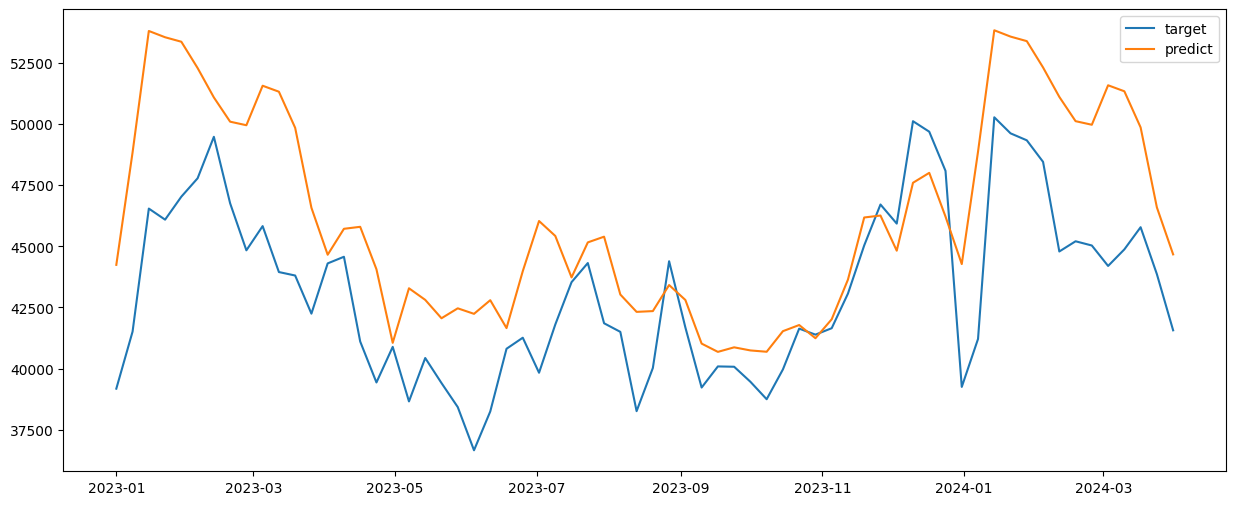

In [ ]:
plt.plot(test, label = 'target')
plt.plot(test_prev, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(test, test_prev)

0.07754305279639596

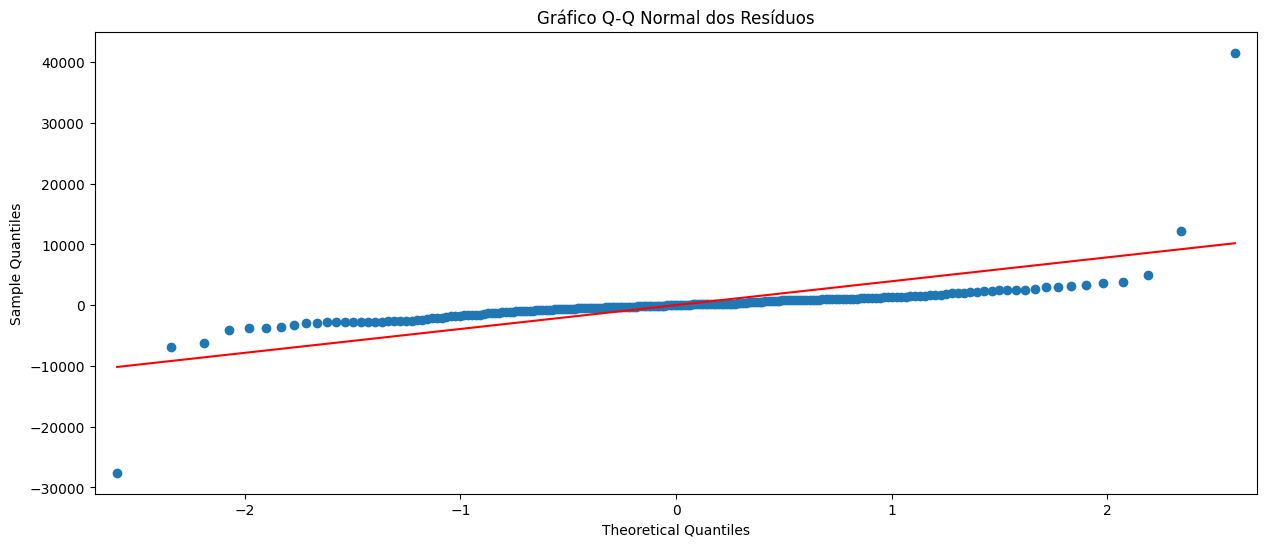

In [ ]:
residuals = model.resid

sm.qqplot(residuals, line='s')
plt.title("Gráfico Q-Q Normal dos Resíduos")
plt.show()


.

## 2° Data Base → Energy Generation Time Series (Série de consumo de energia nos USA em todos os setores)

### Sobre o conjunto de dados
1. A Administração de Informações sobre Energia dos EUA coleta dados sobre a geração líquida de eletricidade nos EUA e em cada estado.
O arquivo csv abaixo contém informações sobre essa geração de energia elétrica para cada estado e discrimina por setor.

2. previsão do consumo de enrgia no Hawaii em todos os setores

In [ ]:
path = '/content/electricity_data.csv'

dados = pd.read_csv(path)

In [ ]:
dados

,Unnamed: 0,United States : all sectors,United States : electric utility,United States : independent power producers,United States : all commercial,United States : all industrial,New England : all sectors,New England : electric utility,New England : independent power producers,New England : all commercial,...,Alaska : all sectors,Alaska : electric utility,Alaska : independent power producers,Alaska : all commercial,Alaska : all industrial,Hawaii : all sectors,Hawaii : electric utility,Hawaii : independent power producers,Hawaii : all commercial,Hawaii : all industrial
0,2001-01-01,332493,236467,82269,629,13128,10005,2467,6959,68,...,590,493,20,10,67,925,524,320,--,81
1,2001-02-01,282940,199802,71169,548,11421,8662,2289,5873,65,...,546,423,22,18,84,801,457,293,--,51
2,2001-03-01,300707,211942,75758,553,12454,9506,2061,6882,70,...,587,459,23,18,88,873,573,254,--,46
3,2001-04-01,278079,197499,68356,550,11674,8321,1711,6096,70,...,489,402,17,9,61,836,522,278,--,36
4,2001-05-01,300492,215508,72658,575,11751,8592,1372,6677,72,...,485,395,16,8,65,886,539,310,--,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2021-11-01,315495,163203,139197,1069,12025,8173,134,7710,95,...,510,447,23,32,7,788,405,329,35,19
251,2021-12-01,339684,178473,147650,1127,12434,8490,168,7989,97,...,554,490,22,33,8,779,396,333,31,20
252,2022-01-01,378967,205875,159328,1203,12560,9739,363,9041,107,...,584,524,NM,32,10,745,443,246,35,21
253,2022-02-01,327767,172436,143311,1033,10987,8065,243,7513,100,...,474,416,21,26,11,677,384,247,29,17


In [ ]:
dados = dados.rename(columns={'Unnamed: 0': 'Date'})

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])

In [ ]:
dados = dados.set_index('Date')

In [ ]:
dados = pd.DataFrame(index=dados.index, data=dados['Hawaii : all sectors'])

In [ ]:
dados

,Hawaii : all sectors
Date,
2001-01-01,925
2001-02-01,801
2001-03-01,873
2001-04-01,836
2001-05-01,886
...,...
2021-11-01,788
2021-12-01,779
2022-01-01,745


<Axes: xlabel='Date'>

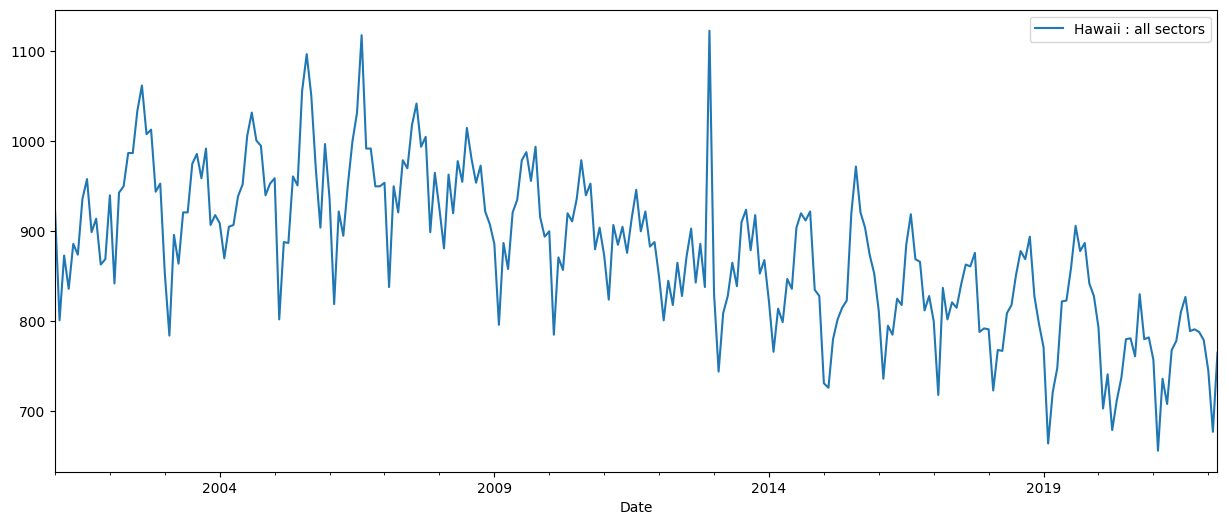

In [ ]:
dados.plot()

Separando base de dados em treino e teste

In [ ]:
train, test = dados.loc[:'2015'], dados.loc['2016':]

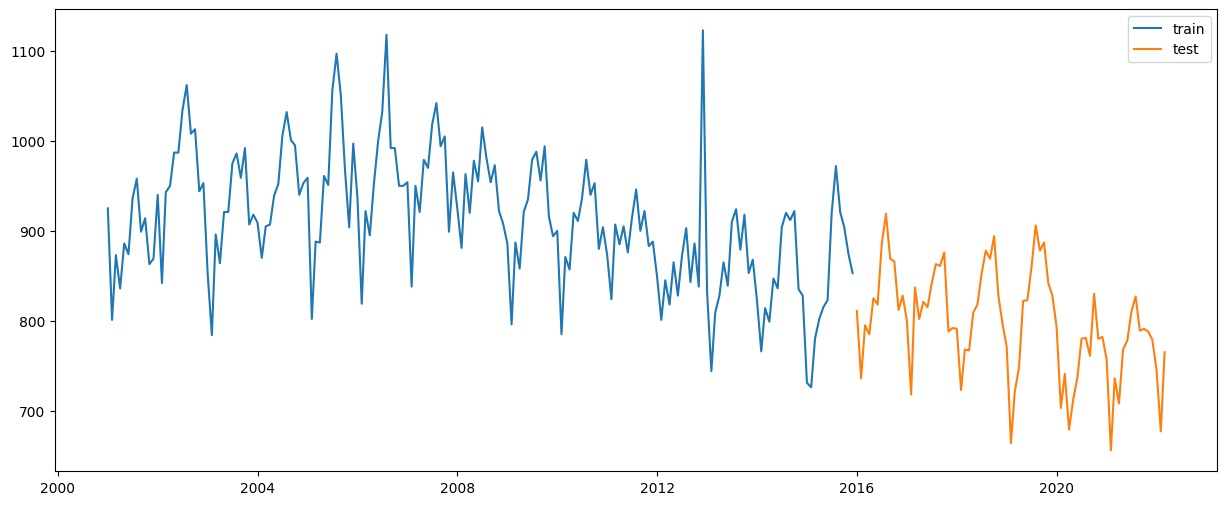

In [ ]:
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.legend(loc = 'best')
plt.show()

Analise da autocorralation e partial autocorrelation

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

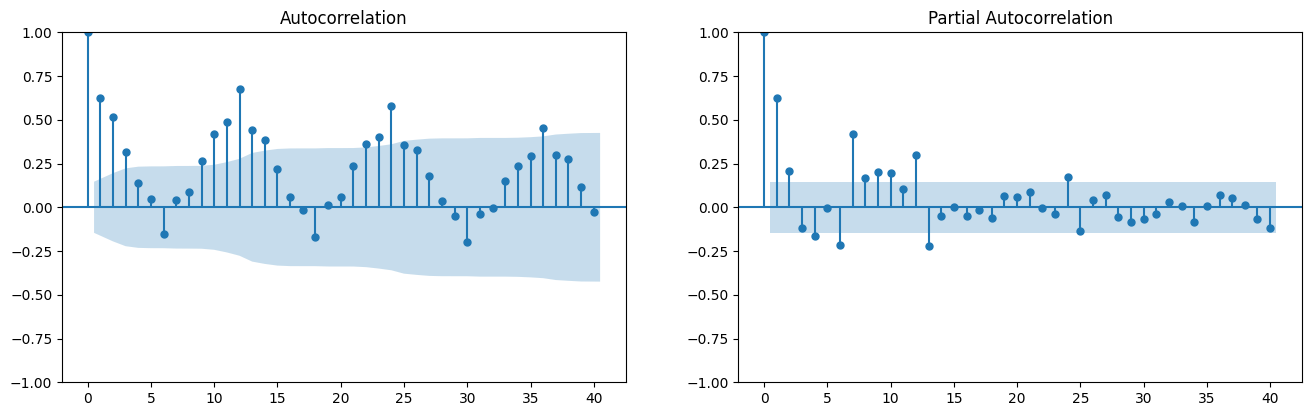

In [ ]:
acf_pacf(train, 40)

In [ ]:
def teste_estacionaria(serie):
  p_value = adfuller(serie)[1]
  print(p_value)
  if p_value < 0.05:
    print("Série estacionaria")
  else:
    print("Série não estacionaria")


In [ ]:
train.head(5)

,Hawaii : all sectors
Date,
2001-01-01,925
2001-02-01,801
2001-03-01,873
2001-04-01,836
2001-05-01,886


In [ ]:
teste_estacionaria(train)

0.8683745795573725
Série não estacionaria


<Axes: xlabel='Date'>

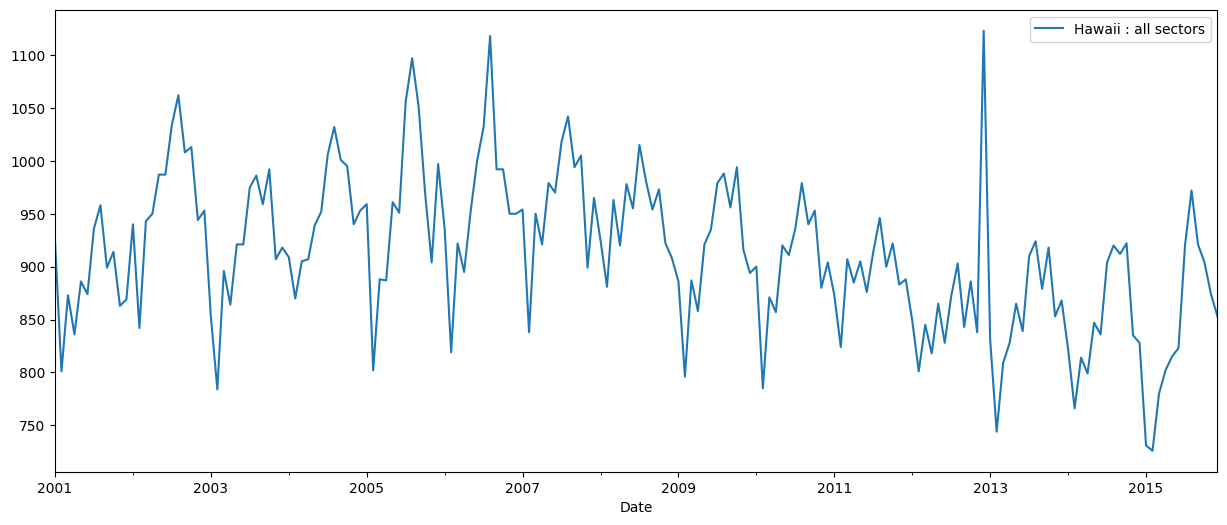

In [ ]:
train.plot()

<Axes: xlabel='Date'>

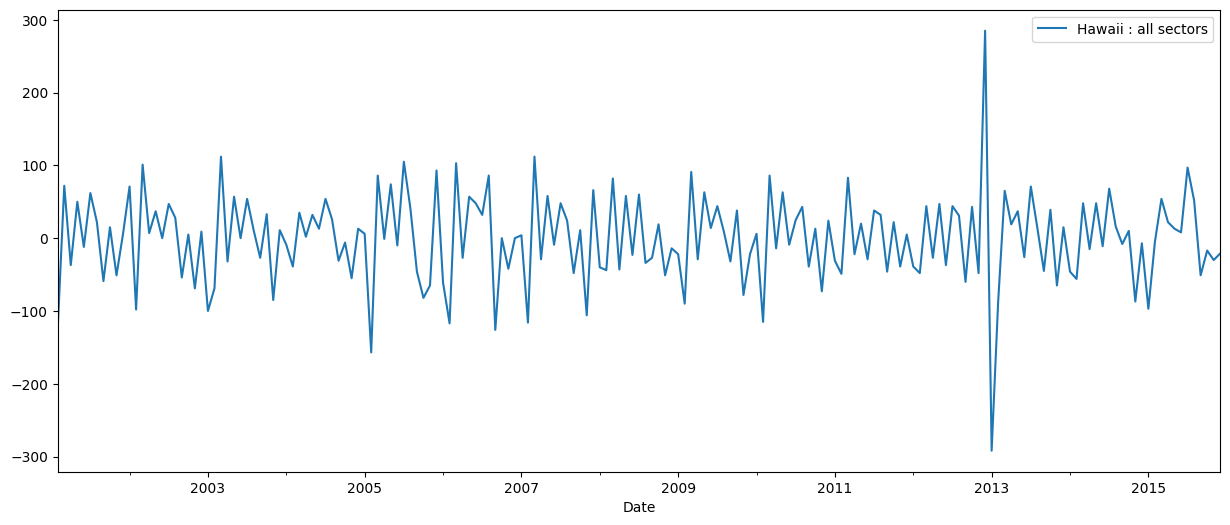

In [ ]:
train.diff(1).dropna().plot()

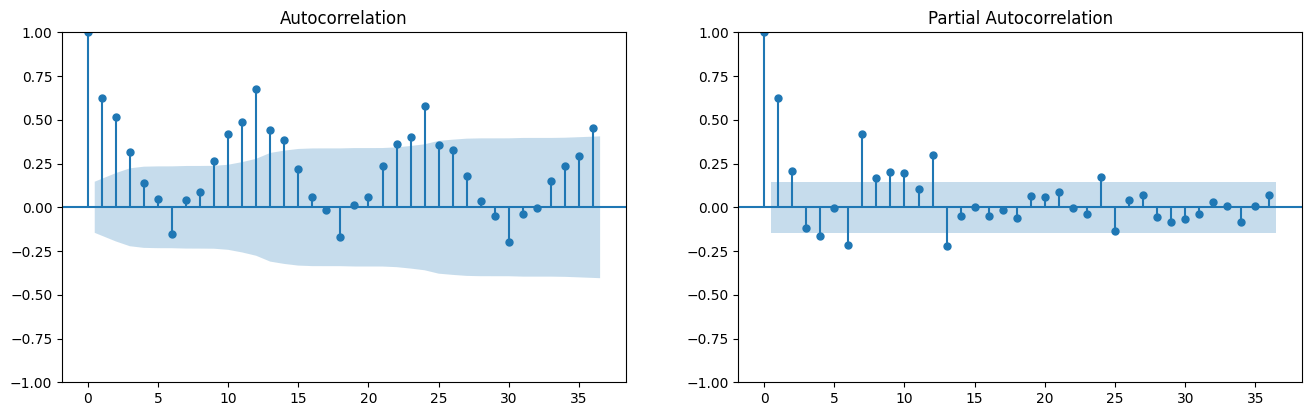

In [ ]:
acf_pacf(train, 36)

Criando o modelo SARIMAX

In [ ]:
model = SARIMAX(train,
                order = (2, 1, 3)
                ).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
prev_train = model.predict()

In [ ]:
prev_train

2001-01-01      0.000000
2001-02-01    923.787523
2001-03-01    846.183340
2001-04-01    856.808199
2001-05-01    845.856146
                 ...    
2015-08-01    891.575822
2015-09-01    910.036957
2015-10-01    899.305095
2015-11-01    875.201279
2015-12-01    844.453530
Freq: MS, Name: predicted_mean, Length: 180, dtype: float64

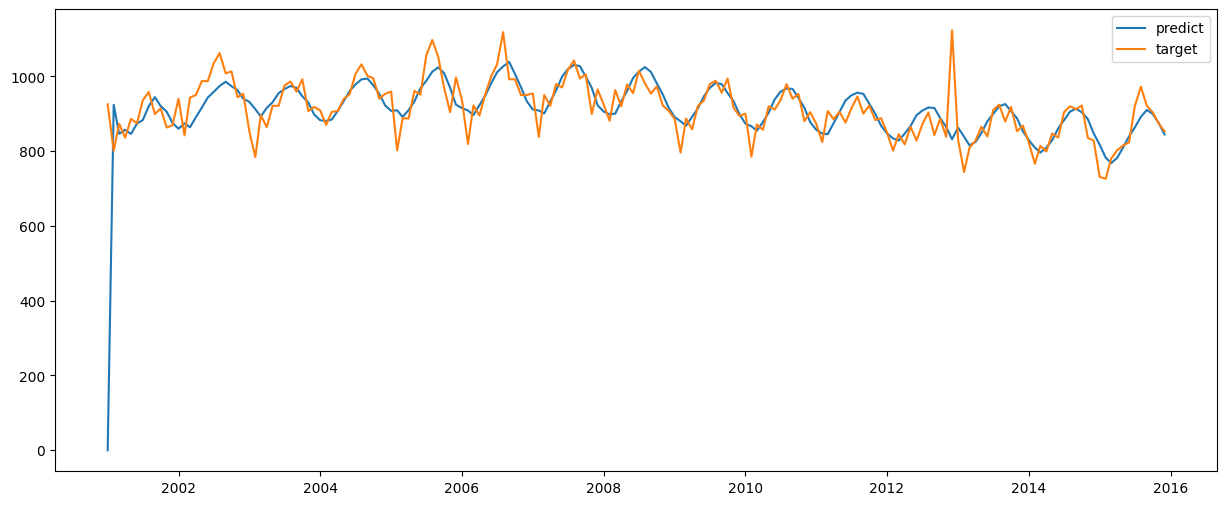

In [ ]:
plt.plot(prev_train, label = 'predict')
plt.plot(train, label = 'target')
plt.legend(loc = 'best')
plt.show()

In [ ]:
MAPE(train, prev_train)

0.0408191036770453

In [ ]:
prev_test = model.forecast(len(test))

In [ ]:
prev_test

2016-01-01    818.185476
2016-02-01    800.210567
2016-03-01    796.973969
2016-04-01    809.325601
2016-05-01    833.977391
                 ...    
2021-11-01    885.416308
2021-12-01    856.565517
2022-01-01    827.501944
2022-02-01    805.939832
2022-03-01    797.597586
Freq: MS, Name: predicted_mean, Length: 75, dtype: float64

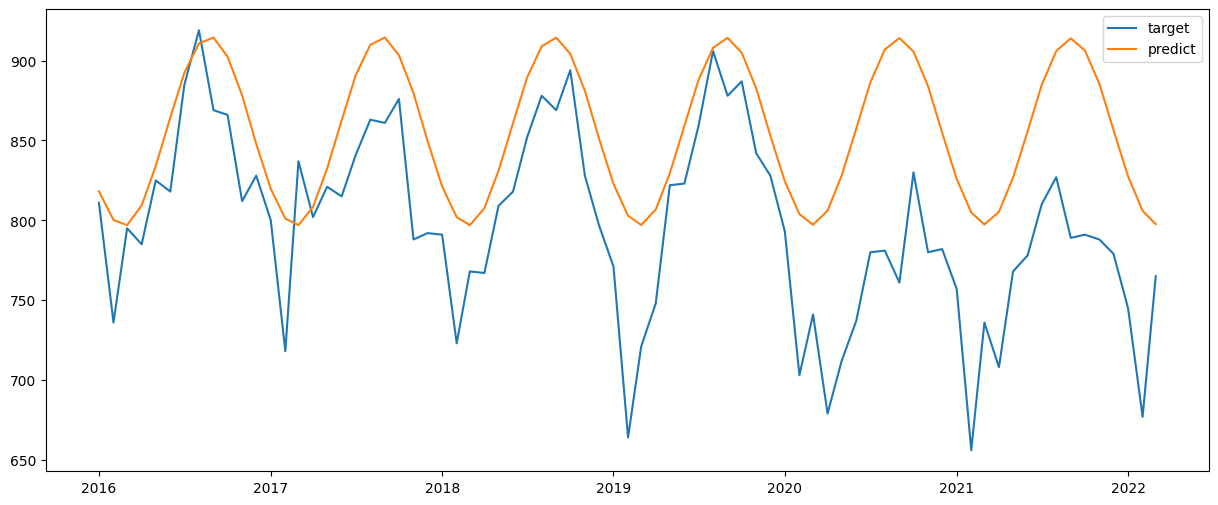

In [ ]:
plt.plot(test, label = 'target')
plt.plot(prev_test, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(test, prev_test)

0.07632597863197046

In [ ]:
p,d,q = 2, 1, 3
P, D, Q = 1, 0, 2
m = 12

model = SARIMAX(train,
                order = (p, d, q ),
                seasonal_order = (P, D, Q, m)
                ).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
train_prev = model.predict()
test_prev = model.forecast(len(test))

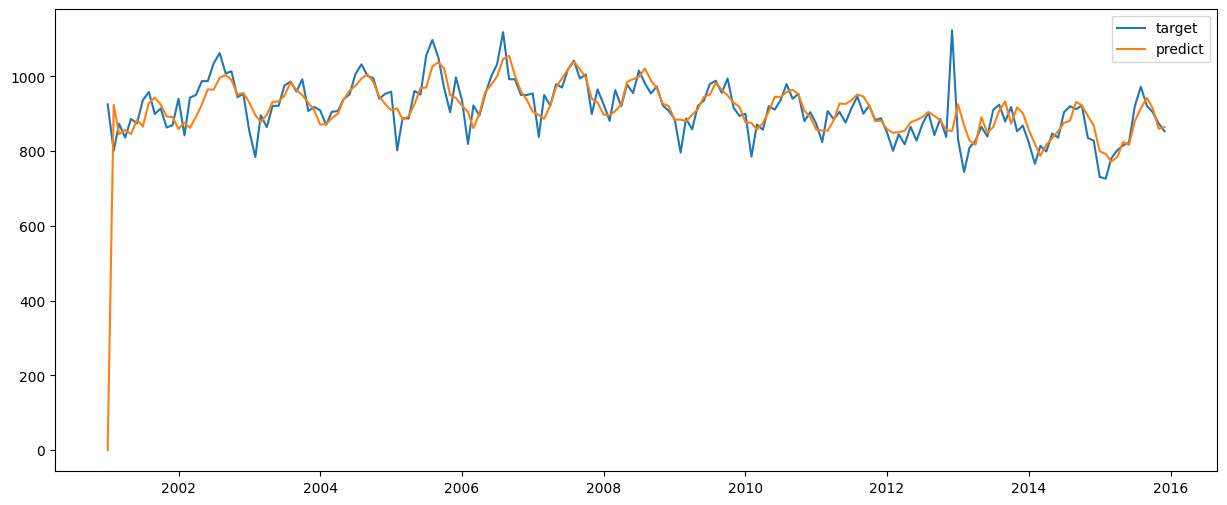

In [ ]:
plt.plot(train, label = 'target')
plt.plot(train_prev, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(train, train_prev)

0.04007444363949068

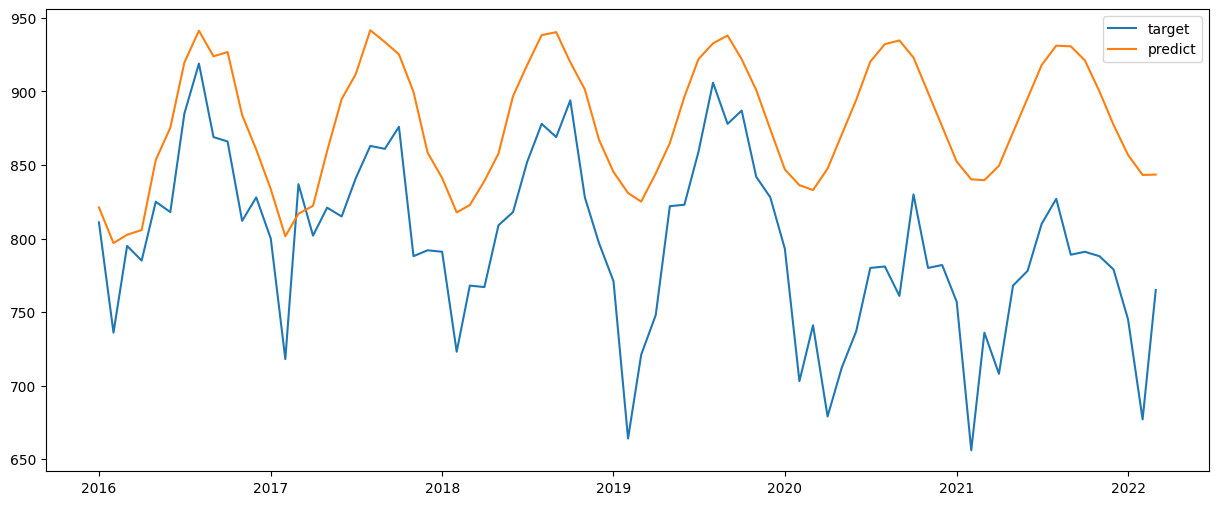

In [ ]:
plt.plot(test, label = 'target')
plt.plot(test_prev, label = 'predict')
plt.legend()
plt.show()

In [ ]:
MAPE(test, test_prev)

0.04535443799882754

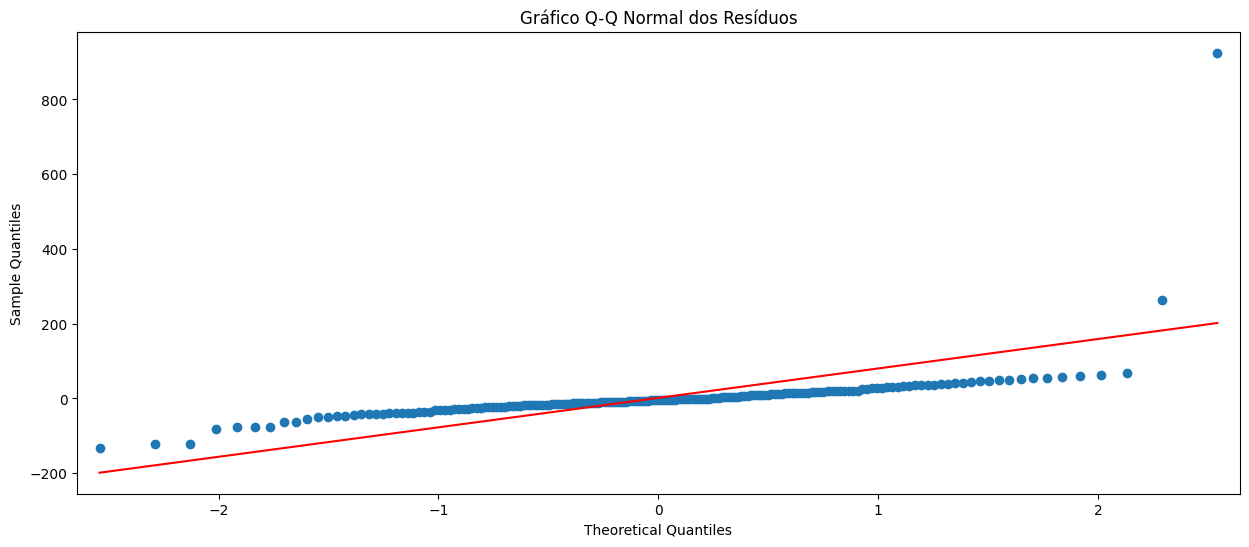

In [ ]:
residuals = model.resid

sm.qqplot(residuals, line='s')
plt.title("Gráfico Q-Q Normal dos Resíduos")
plt.show()

# Agoritimo que usei para encontrar os melhores parâmetros:

In [ ]:
# p_values = [1, 2, 3]
# d_values = [1, 2]
# q_values = [1, 2, 3]
# P_values = [1, 2]
# D_values = [0, 1]
# Q_values = [1, 2]
# m_values = [7]

p_values = [0, 1]
d_values = [0]
q_values = [0, 1, 2, 3, 4, 5, 6, 7]
P_values = [0]
D_values = [0, 1]
Q_values = [0]
m_values = [0, 12, 52]

melhor_modelo = None
melhor_MAPE = np.inf


for p, d, q, P, D, Q, m in product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    try:
        model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m))
        results = model.fit()


        forecast = results.forecast(steps=len(train))


        mape = MAPE(train, forecast)


        if mape < melhor_MAPE:
            melhor_MAPE = mape
            melhor_modelo = model
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conve

In [ ]:
p, d, q, P, D, Q, m

(1, 0, 7, 0, 1, 0, 52)